
## SUMMARY 
#### Wrangling Process
- Gather
- Assess
- Clean
- Store
#### Analyzing Process
- Questions
- Analyzes

## Wrangling Process

In [1]:
import pandas as pd
import numpy as np 
import requests
import tweepy
import json
import os

In [2]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open("image-predictions.tsv", "wb") as file:
    file.write(response.content)
    

In [3]:
tweet_infos = pd.read_csv("data_set_2/twitter-archive-enhanced.csv", sep=",", 
                          dtype={"tweet_id":"object", "retweeted_status_id":"object"})

image_predictions = pd.read_csv("image-predictions.tsv", sep="\t", dtype={"tweet_id":"object"})  

In [4]:
consumer_key = 'liLZ73eupzfhJLPBcxzGDBVtY'
consumer_secret = 'sj8QRUCVF4zBFB5bYef0e9NHZhCJ13Uj9rUF2Gs0mCcZVwJjAz'
access_token = '1052682995868598274-iE1y3grIvRXNRJm1GXkhZHCdOFVXEK'
access_secret = 'vv1yINXwWXLAoc875PyWr4REtVqJNqtO5HOwd6KwXv4kM'

In [5]:
# TWEEPY API ACESSING 

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [6]:
# reading missing info 

if 'missing_info.json' in os.listdir():
    missing_info = pd.read_json('missing_info.json', dtype={"tweet_id":"object"})
else:
    missing_info_list = []
    tweet_ids = tweet_infos.tweet_id.unique()
    for tweet_id in tweet_ids:
        try:
            status = api.get_status(tweet_id)
            retweet_count = status.retweet_count
            favorite_count = status.favorite_count

            missing_info_list.append({"tweet_id": str(tweet_id), 
                                 "retweet_count": str(retweet_count), 
                                 "favorite_count": str(favorite_count)})
            
        except tweepy.error.TweepError:
            continue
            
    with open("missing_info.json", "w", dtype={"tweet_id":"object"}) as file:
        file.write(json.dumps(missing_info_list))

    missing_info = pd.read_json("missing_info.json", dtype={"tweet_id":"object"})

In [7]:
tweet_infos.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
346,831926988323639298,8.319030e+17,20683724.0,2017-02-15 18:03:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@UNC can confirm 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
166,859924526012018688,NaN,NaN,2017-05-04 00:15:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Milky. She has no idea what happened. Jus...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859924526...,12,10,Milky,None,None,None,None
1024,746507379341139972,NaN,NaN,2016-06-25 00:56:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shiloh. She did not pass the soft mout...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746507379...,10,10,Shiloh,None,None,None,None


In [8]:
image_predictions.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
951,704871453724954624,https://pbs.twimg.com/media/Ccg02LiWEAAJHw1.jpg,1,Norfolk_terrier,0.689504,True,soft-coated_wheaten_terrier,0.101480,True,Norwich_terrier,0.055779,True
1164,735256018284875776,https://pbs.twimg.com/media/CjQnclkVEAA4pnK.jpg,1,Staffordshire_bullterrier,0.523191,True,French_bulldog,0.351104,True,doormat,0.028075,False
1330,757597904299253760,https://pbs.twimg.com/media/CoOGZjiWAAEMKGx.jpg,1,doormat,0.836106,False,wallet,0.056627,False,purse,0.051333,False


In [9]:
missing_info.sample(3)

,favorite_count,retweet_count,tweet_id
1199,3254,830,714251586676113411
1189,2404,642,715220193576927233
762,13142,4657,775729183532220416


In [10]:
ti_df = tweet_infos.copy()
ip_df = image_predictions.copy()
mi_df = missing_info.copy()

#### Observing datasets issues

In [11]:
ti_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(3), int64(2), ob

In [12]:
ip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [13]:
mi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726 entries, 0 to 1725
Data columns (total 3 columns):
favorite_count    1726 non-null int64
retweet_count     1726 non-null int64
tweet_id          1726 non-null object
dtypes: int64(2), object(1)
memory usage: 40.5+ KB


In [14]:
# testing
ti_df.source[0].split("</a>")[0].split(">")[-1]

'Twitter for iPhone'

In [15]:
low_stra = ti_df.name.value_counts()
strange_names = low_stra[low_stra.index.str.islower()].index.tolist()

# None = NaN

None_names_ind = ti_df[ti_df.name.str.contains("None")].index.tolist()

In [16]:
# Seeing where more is "None" 
ti_df[ti_df.doggo.str.contains("None")].doggo

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
30      None
        ... 
2326    None
2327    None
2328    None
2329    None
2330    None
2331    None
2332    None
2333    None
2334    None
2335    None
2336    None
2337    None
2338    None
2339    None
2340    None
2341    None
2342    None
2343    None
2344    None
2345    None
2346    None
2347    None
2348    None
2349    None
2350    None
2351    None
2352    None
2353    None
2354    None
2355    None
Name: doggo, Length: 2259, dtype: object

In [17]:
filt = ti_df[ti_df.expanded_urls.fillna("").str.contains(",")]
splitted_url = filt["expanded_urls"].str.split(",").str[-1] 

ind_not_twi = splitted_url[~splitted_url.str.contains("twitter.com")].index

In [18]:
# test for verification from ind_not_twi
ti_df.loc[ind_not_twi, "expanded_urls"].tolist() 

['https://vine.co/v/5W2Dg3XPX7a,https://vine.co/v/5W2Dg3XPX7a',
 'https://vine.co/v/5gKxeUpuKEr,https://vine.co/v/5gKxeUpuKEr',
 'https://vine.co/v/5QWd3LZqXxd,https://vine.co/v/5QWd3LZqXxd',
 'https://vine.co/v/5ghHLBMMdlV,https://vine.co/v/5ghHLBMMdlV',
 'https://vine.co/v/eEZXZI1rqxX,https://vine.co/v/eEZXZI1rqxX',
 'https://vine.co/v/iqMjlxULzbn,https://vine.co/v/iqMjlxULzbn',
 'https://vine.co/v/5BYq6hmrEI3,https://vine.co/v/5BYq6hmrEI3',
 'https://vine.co/v/iEggaEOiLO3,https://vine.co/v/iEggaEOiLO3',
 'https://vine.co/v/OEppMFbejFz,https://vine.co/v/OEppMFbejFz',
 'https://vine.co/v/hQJbaj1VpIz,https://vine.co/v/hQJbaj1VpIz',
 'https://vine.co/v/iXQAm5Lrgrh,https://vine.co/v/iXQAm5Lrgrh',
 'https://weratedogs.com/pages/about-us,https://weratedogs.com/pages/about-us',
 'https://vine.co/v/ibvnzrauFuV,https://vine.co/v/ibvnzrauFuV']

In [19]:
# checking duplicates
ti_df[ti_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [20]:
ip_df[ip_df.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [21]:
mi_df[mi_df.tweet_id.duplicated()]

,favorite_count,retweet_count,tweet_id


In [22]:
#verifying if p1_conf + p2_conf + p3_conf = 1

testing_conf = ip_df["p1_conf"] + ip_df["p2_conf"] + ip_df["p3_conf"]
testing_conf[testing_conf>1]

106    1.0
dtype: float64

In [23]:
ti_df[ti_df["rating_numerator"] > 20][["tweet_id", "expanded_urls", "text", "rating_numerator"]]
# algumas notas ultrapassam 10 e as vezes tem características que precisam ser averiguadas. 
# outras parecem apenas fazer parte das avaliações, como 666/10. 

,tweet_id,expanded_urls,text,rating_numerator
188,855862651834028034,NaN,@dhmontgomery We also gave snoop dogg a 420/10...,420
189,855860136149123072,NaN,@s8n You tried very hard to portray this good ...,666
290,838150277551247360,NaN,@markhoppus 182/10,182
313,835246439529840640,NaN,@jonnysun @Lin_Manuel ok jomny I know you're e...,960
340,832215909146226688,https://twitter.com/dog_rates/status/786709082...,"RT @dog_rates: This is Logan, the Chow who liv...",75
433,820690176645140481,https://twitter.com/dog_rates/status/820690176...,The floofs have been released I repeat the flo...,84
516,810984652412424192,"https://www.gofundme.com/sams-smile,https://tw...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,24
695,786709082849828864,https://twitter.com/dog_rates/status/786709082...,"This is Logan, the Chow who lived. He solemnly...",75
763,778027034220126208,https://twitter.com/dog_rates/status/778027034...,This is Sophie. She's a Jubilant Bush Pupper. ...,27
902,758467244762497024,https://twitter.com/dog_rates/status/758467244...,Why does this never happen at my front door......,165


In [24]:
ti_df[ti_df["rating_denominator"] != 10]
#some rating_denominator are 0, 15, 70. Rating litmit is 10.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.40373189193257e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [25]:
above_rating_df = ti_df[(ti_df["rating_numerator"] > 20) | (ti_df["rating_denominator"] != 10)]

texts_ar = above_rating_df.text.tolist()
indices_ar = above_rating_df.index.tolist()

for i, text in zip(indices_ar, texts_ar):
    print(i, text, "\n")

188 @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research 

189 @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10 

290 @markhoppus 182/10 

313 @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho 

340 RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu… 

342 @docmisterio account started on 11/15/15 

433 The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd 

516 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx 

695 This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS 

763 This is Sophie. She's a 

#### Cleaning To-do List
Twitter information df 

- rating_numerator and rating_denominator columns have some wrong numbers  (based on text column)
- rating_numerator and rating denominator columns have "fake numerators" and "fake denominators" that should've be null (based on text column) with comma.
- There is no pattern in expanded_urls, some have duplicated
- timestamp should be on datetime
- Source column has a lot of unwanted information like HTML tags
plan: remove the source, excluding the link
- doggo, floofer, pupper,puppo and name columns has None rows they've should be Null 
- Some names are not real name. They should be null values: strange_names


Prediction images df
- Best prediction is not selected
- p1, p2 and p3 have no pattern for breeds

Tidiness issues in tweet_info:
- doggo floofer pupper and puppo should be in one column: dog stage
Tidiness issues in General: 
- all datasets should be together, using a merge or join

ISSUE: rating_numerator and rating_denominator columns have some wrong numbers (based on text column)

PLAN: Fix the numbers in the columns for numerator and denominator

In [26]:
# selecionando indices de textos que vamos remover e indicez de textos que vamos consertar. 
# os que vamos consertar sao aqueles que possuem outras frações e podem ter o numerador e/ou denominador errados (com pontos)
# os que vamos remover são os que nao fazem sentido estarem ali. nao possuem rating nenhum
num_remove = [290, 342, 516] 
num_fix = [313, 340, 695, 763, 784, 1068, 1165, 1202, 1662, 1712, 2335] # 979 e 2074 parecem ter que deletar mas nao

In [27]:
def fixing_text(row, num):
    index = row["index"]
    if index not in num_fix:
        return row[num] 
    
x = ti_df.reset_index(drop=False).apply(lambda row: fixing_text(row, "rating_numerator"), axis=1)

In [28]:
x.head()

0    13.0
1    13.0
2    12.0
3    13.0
4    12.0
dtype: float64

In [29]:
def fixing_text(row, num):
    index = row["index"]
    if index not in num_fix:
        return row[num] 
    
    else:
        raw_text = row["text"]
        
        wo_splitted_https = raw_text.split(" https:")[0]
        splitted_text = wo_splitted_https.split("/")
        
        if num == "rating_numerator":
            return splitted_text[0].split(" ")[-1]   # note que fizemos abaixo, para em outras variaveis (por conta da função) aplicarmos la em cima
        elif num == "rating_denominator":
            return splitted_text[-1].split(" ")[0]   # o .split(" ")[0] pode nao ser necessário pra alguns mas como é para outros é necessário colocar 
        
ti_df["rating_numerator"] = ti_df.reset_index(drop=False).apply(lambda row: fixing_text(row, "rating_numerator"), axis=1).astype("float64")

ti_df["rating_denominator"] = ti_df.reset_index(drop=False).apply(lambda row: fixing_text(row, "rating_denominator"), axis=1).astype("float64")
      

In [30]:
ti_df.reset_index(drop=False)

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None
5,5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,None,None,None,None
6,6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,None,None,None,None
7,7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,None,None,None,None
8,8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,None,None,None,None
9,9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,None,None,None


In [31]:
sem_h = above_rating_df.text[340].split(" https:")[0]
sem_h.split("/")[0].split(" ")[-1]

'9.75'

In [32]:
# test

ti_df["rating_numerator"][340]

9.75

ISSUE: rating_numerator and rating denominator columns have "fake numerators" and "fake denominators" that should've be null (based on text column).

PLAN: Transform and certificate that false numerators and denominators are null in those columns

In [33]:
ti_df.loc[num_remove, ["rating_numerator", "rating_denominator"]] = np.nan

In [34]:
# test 
ti_df.loc[num_remove, ["rating_numerator", "rating_denominator"]]

,rating_numerator,rating_denominator
290,NaN,NaN
342,NaN,NaN
516,NaN,NaN


ISUE: There is no pattern in expanded_urls, some have duplicated with comma.

PLAN: split duplicated and maitain the last

In [35]:
# making sure that the expended_urls column has only the last links, when they have more than one.
ti_df["expanded_urls"] = ti_df["expanded_urls"].str.split(",").str[-1] 

In [36]:
# test
ti_df["expanded_urls"].sample(3)

1864    https://twitter.com/dog_rates/status/675362609...
409                                                   NaN
1739    https://twitter.com/dog_rates/status/679511351...
Name: expanded_urls, dtype: object

### Tweet_infos

ISSUE: timestamp column is not in datetime

PLAN: transform to datetime

In [37]:
ti_df["timestamp"] = pd.to_datetime(ti_df["timestamp"], format='%Y-%m-%d %H:%M:%S.%f')

In [38]:
ti_df["timestamp"]

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
5      2017-07-29 00:08:17+00:00
6      2017-07-28 16:27:12+00:00
7      2017-07-28 00:22:40+00:00
8      2017-07-27 16:25:51+00:00
9      2017-07-26 15:59:51+00:00
10     2017-07-26 00:31:25+00:00
11     2017-07-25 16:11:53+00:00
12     2017-07-25 01:55:32+00:00
13     2017-07-25 00:10:02+00:00
14     2017-07-24 17:02:04+00:00
15     2017-07-24 00:19:32+00:00
16     2017-07-23 00:22:39+00:00
17     2017-07-22 16:56:37+00:00
18     2017-07-22 00:23:06+00:00
19     2017-07-21 01:02:36+00:00
20     2017-07-20 16:49:33+00:00
21     2017-07-19 16:06:48+00:00
22     2017-07-19 03:39:09+00:00
23     2017-07-19 00:47:34+00:00
24     2017-07-18 16:08:03+00:00
25     2017-07-18 00:07:08+00:00
26     2017-07-17 16:17:36+00:00
27     2017-07-16 23:58:41+00:00
28     2017-07-16 20:14:00+00:00
29     2017-07-15 23:25:31+00:00
          

ISSUE: Source column has a lot of unwanted information like HTML tags shouuld be only the source plan: tirar somente a fonte, excluindo o link etc "Twitter for Iphone"

PLAN: Split row's texts, taking only de source 

In [39]:
ti_df.source.str.split("</a>").str[0].str.split(">").str[-1]

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
5       Twitter for iPhone
6       Twitter for iPhone
7       Twitter for iPhone
8       Twitter for iPhone
9       Twitter for iPhone
10      Twitter for iPhone
11      Twitter for iPhone
12      Twitter for iPhone
13      Twitter for iPhone
14      Twitter for iPhone
15      Twitter for iPhone
16      Twitter for iPhone
17      Twitter for iPhone
18      Twitter for iPhone
19      Twitter for iPhone
20      Twitter for iPhone
21      Twitter for iPhone
22      Twitter for iPhone
23      Twitter for iPhone
24      Twitter for iPhone
25      Twitter for iPhone
26      Twitter for iPhone
27      Twitter for iPhone
28      Twitter for iPhone
29      Twitter for iPhone
               ...        
2326    Twitter for iPhone
2327    Twitter for iPhone
2328    Twitter for iPhone
2329    Twitter for iPhone
2330    Twitter for iPhone
2331    Twitter for iPhone
2

In [40]:
def fixing_source(row):
    source = row["source"]
    
    return source.split("</a>")[0].split(">")[-1] 

ti_df["source"] = ti_df.apply(fixing_source, axis=1)

In [41]:
# test 
ti_df.source

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
5       Twitter for iPhone
6       Twitter for iPhone
7       Twitter for iPhone
8       Twitter for iPhone
9       Twitter for iPhone
10      Twitter for iPhone
11      Twitter for iPhone
12      Twitter for iPhone
13      Twitter for iPhone
14      Twitter for iPhone
15      Twitter for iPhone
16      Twitter for iPhone
17      Twitter for iPhone
18      Twitter for iPhone
19      Twitter for iPhone
20      Twitter for iPhone
21      Twitter for iPhone
22      Twitter for iPhone
23      Twitter for iPhone
24      Twitter for iPhone
25      Twitter for iPhone
26      Twitter for iPhone
27      Twitter for iPhone
28      Twitter for iPhone
29      Twitter for iPhone
               ...        
2326    Twitter for iPhone
2327    Twitter for iPhone
2328    Twitter for iPhone
2329    Twitter for iPhone
2330    Twitter for iPhone
2331    Twitter for iPhone
2

ISSUE: doggo, floofer, pupper,puppo and name column has None rows they've should be Null

PLAN: Transform None rows into np.nan


In [42]:
cols_dogs = ["name", "doggo", "floofer", "pupper", "puppo"]
ti_df[cols_dogs] = ti_df[cols_dogs].replace("None", np.nan)

In [43]:
ti_df.sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
213,851591660324737024,NaN,NaN,2017-04-11 00:24:08+00:00,Twitter for iPhone,Oh jeez u did me quite the spook little fella....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/851591660...,11.0,10.0,NaN,NaN,NaN,NaN,NaN
643,793195938047070209,NaN,NaN,2016-10-31 21:00:23+00:00,Twitter for iPhone,Say hello to Lily. She's pupset that her costu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793195938...,12.0,10.0,Lily,NaN,NaN,NaN,puppo
1981,672970152493887488,NaN,NaN,2015-12-05 02:46:02+00:00,Twitter for iPhone,This is Chet. He's having a hard time. Really ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672970152...,7.0,10.0,Chet,NaN,NaN,pupper,NaN
666,790581949425475584,NaN,NaN,2016-10-24 15:53:19+00:00,Twitter for iPhone,This is Duke. He sneaks into the fridge someti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790581949...,11.0,10.0,Duke,NaN,NaN,NaN,NaN
436,820314633777061888,NaN,NaN,2017-01-14 17:00:24+00:00,Twitter for iPhone,We are proud to support @LoveYourMelon on thei...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820314633...,14.0,10.0,NaN,NaN,NaN,NaN,NaN
2020,672095186491711488,NaN,NaN,2015-12-02 16:49:14+00:00,Twitter for iPhone,This is Tuco. That's the toast that killed his...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672095186...,9.0,10.0,Tuco,NaN,NaN,NaN,NaN
167,859851578198683649,NaN,NaN,2017-05-03 19:26:06+00:00,Twitter for iPhone,Meet Trooper. He picks pup recyclables that ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859851578...,13.0,10.0,Trooper,NaN,NaN,NaN,NaN
931,754120377874386944,NaN,NaN,2016-07-16 01:08:03+00:00,Twitter for iPhone,When you hear your owner say they need to hatc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754120377...,10.0,10.0,NaN,NaN,NaN,NaN,NaN
246,845677943972139009,NaN,NaN,2017-03-25 16:45:08+00:00,Twitter for iPhone,C'mon guys. Please only send in dogs. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/845677943...,12.0,10.0,NaN,NaN,NaN,NaN,NaN
1913,674372068062928900,NaN,NaN,2015-12-08 23:36:44+00:00,Twitter for iPhone,Meet Chesney. On the outside he stays calm &am...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674372068...,10.0,10.0,Chesney,NaN,NaN,NaN,NaN


ISSUE: Some names are not real name. They should be null values: strange_names

PLAN: Transfrom stange_names into null

In [44]:
ti_df.name = ti_df.name.replace(strange_names, np.nan)

In [45]:
ti_df.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5            NaN
6            Jax
7            NaN
8           Zoey
9         Cassie
10          Koda
11         Bruno
12           NaN
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22           NaN
23        Canela
24           NaN
25           NaN
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326         NaN
2327         NaN
2328         NaN
2329         NaN
2330         NaN
2331         NaN
2332         NaN
2333         NaN
2334         NaN
2335         NaN
2336         NaN
2337         NaN
2338         NaN
2339         NaN
2340         NaN
2341         NaN
2342         NaN
2343         NaN
2344         NaN
2345         NaN
2346         NaN
2347         NaN
2348         NaN
2349         NaN
2350         NaN
2351         NaN
2352         NaN
2353         N

ISSUE: Best prediction is not selected, which can be good for analysis
    
PLAN: Create a column for best prediction,selected by the higher confidence

In [46]:
def best_predi(row):
    if row["p1_conf"] > row["p2_conf"] and row["p1_conf"] > row["p3_conf"]:
        return row["p1"]
    elif row["p2_conf"] > row["p1_conf"] and row["p2_conf"] > row["p3_conf"]:
        return row["p2"]
    else:
        return row["p3"]

(ip_df.apply(best_predi, axis=1) == ip_df.p1).all()


True

In [47]:
ip_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [48]:
(ip_df.p1_conf>ip_df.p3_conf).all()

True

ISSUE: p1, p2 and p3 have no pattern for breeds

PLAN: Standardize 

In [49]:
col_wrong = ["p1", "p2", "p3"]
for column in col_wrong:
    ip_df[column] = ip_df[column].str.replace('_',' ').str.title()

In [50]:
ip_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


ISSUE: doggo floofer pupper and puppo should be in one column: dog stage
        
PLAN: Create the dog stage column

In [51]:
ti_df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,NaN,NaN,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,NaN,NaN,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890971913...,13.0,10.0,Jax,NaN,NaN,NaN,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,NaN,NaN,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN,NaN,NaN,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,NaN,NaN,NaN


In [52]:
ti_df = ti_df.melt(id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'], var_name='dog_stage')

In [53]:
ti_df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,value
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,doggo,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,doggo,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,doggo,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,doggo,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,doggo,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,doggo,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890971913...,13.0,10.0,Jax,doggo,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,doggo,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,doggo,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,doggo


In [54]:
ti_df = ti_df.drop(columns=['dog_stage'])

In [55]:
ti_df = ti_df.rename(columns={"value": "dog_stage"})

In [56]:
ti_df.sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1978,672984142909456390,NaN,NaN,2015-12-05 03:41:37+00:00,Twitter for iPhone,Very happy pup here. Always smiling. Loves his...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672984142...,9.0,10.0,NaN,NaN
7553,814578408554463233,NaN,NaN,2016-12-29 21:06:41+00:00,Twitter for iPhone,RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954092195594e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9.0,10.0,Beau,NaN
3478,730573383004487680,NaN,NaN,2016-05-12 01:40:42+00:00,Twitter for iPhone,This is Rooney. He can't comprehend glass. 10/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730573383...,10.0,10.0,Rooney,NaN
5809,736225175608430592,NaN,NaN,2016-05-27 15:58:54+00:00,Twitter for iPhone,We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736225175...,10.0,10.0,NaN,NaN
8554,693109034023534592,NaN,NaN,2016-01-29 16:30:45+00:00,Twitter for iPhone,"""Thank you friend that was a swell petting"" 11...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/693109034...,11.0,10.0,NaN,NaN
5572,763167063695355904,NaN,NaN,2016-08-10 00:16:21+00:00,Twitter for iPhone,RT @dog_rates: Meet Eve. She's a raging alcoho...,6.732952685536051e+17,4.196984e+09,2015-12-06 00:17:55 +0000,https://twitter.com/dog_rates/status/673295268...,8.0,10.0,Eve,pupper
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10+00:00,Twitter for iPhone,Yes I do realize a rating of 4/20 would've bee...,NaN,NaN,NaN,NaN,4.0,20.0,NaN,NaN
4116,678708137298427904,NaN,NaN,2015-12-20 22:46:44+00:00,Vine - Make a Scene,Here we are witnessing a wild field pupper. Lo...,NaN,NaN,NaN,https://vine.co/v/eQjxxYaQ60K,10.0,10.0,NaN,NaN
1799,677187300187611136,NaN,NaN,2015-12-16 18:03:28+00:00,Twitter for iPhone,Here we see a Byzantine Rigatoni. Very aerodyn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677187300...,9.0,10.0,NaN,NaN
1594,686377065986265092,NaN,NaN,2016-01-11 02:40:19+00:00,Twitter for iPhone,Meet Birf. He thinks he's gone blind. 10/10 ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686377065...,10.0,10.0,Birf,NaN


In [57]:
ip_ti = ip_df.merge(ti_df, how="outer", on=("tweet_id"))

In [58]:
ip_ti.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,...,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8.0,10.0,NaN,NaN
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,...,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8.0,10.0,NaN,NaN
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,...,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8.0,10.0,NaN,NaN
3,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,...,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8.0,10.0,NaN,NaN
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,...,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,NaN,NaN


In [59]:
ip_mi = ip_df.merge(mi_df, how="outer", on=("tweet_id"))
ip_mi.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True,NaN,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True,NaN,NaN
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,NaN,NaN
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True,NaN,NaN
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,NaN,NaN


##### Droping Nulls

In [60]:
rating_cols = ip_ti[['tweet_id', 'rating_numerator', 'rating_denominator', 'p1', 'p2', 'p3']].dropna(axis=0)
rating_cols

,tweet_id,rating_numerator,rating_denominator,p1,p2,p3
0,666020888022790149,8.0,10.0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,666020888022790149,8.0,10.0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
2,666020888022790149,8.0,10.0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
3,666020888022790149,8.0,10.0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
4,666029285002620928,7.0,10.0,Redbone,Miniature Pinscher,Rhodesian Ridgeback
5,666029285002620928,7.0,10.0,Redbone,Miniature Pinscher,Rhodesian Ridgeback
6,666029285002620928,7.0,10.0,Redbone,Miniature Pinscher,Rhodesian Ridgeback
7,666029285002620928,7.0,10.0,Redbone,Miniature Pinscher,Rhodesian Ridgeback
8,666033412701032449,9.0,10.0,German Shepherd,Malinois,Bloodhound
9,666033412701032449,9.0,10.0,German Shepherd,Malinois,Bloodhound


###  Storing cleaned datasets

In [61]:
ti_df.to_csv("tweet_info_clean.csv", sep=",", index=False)
ip_df.to_csv("image_prediction_clean.csv", sep=",", index=False)
mi_df.to_csv("missing_info_clean.csv", sep=",", index=False)
ip_ti.to_csv("ip_ti.csv", sep=",", index=False)
ip_mi.to_csv("ip_mi.csv", sep=",", index=False)

## Analyzing Process

### Questions: 

 - How many posts per type were made and what percentage for each type?
 - What were the number of tweets per month?
 - Which breeds had the most likes? In what percentage?

In [62]:
import matplotlib.pyplot as plt
import math
import seaborn as sns
import datetime as dt
from matplotlib.patches import Rectangle
from matplotlib.colors import rgb2hex

In [63]:
ip_df.p1.value_counts()

Golden Retriever             150
Labrador Retriever           100
Pembroke                      89
Chihuahua                     83
Pug                           57
Chow                          44
Samoyed                       43
Toy Poodle                    39
Pomeranian                    38
Malamute                      30
Cocker Spaniel                30
French Bulldog                26
Miniature Pinscher            23
Chesapeake Bay Retriever      23
Seat Belt                     22
Siberian Husky                20
German Shepherd               20
Staffordshire Bullterrier     20
Web Site                      19
Cardigan                      19
Teddy                         18
Beagle                        18
Maltese Dog                   18
Shetland Sheepdog             18
Eskimo Dog                    18
Lakeland Terrier              17
Shih-Tzu                      17
Rottweiler                    17
Kuvasz                        16
Italian Greyhound             16
          

In [64]:
rating_cols.groupby('p1').rating_numerator.mean()
rating_cols.groupby('p2').rating_numerator.mean()
rating_cols.groupby('p3').rating_numerator.mean()

p3
Abaya                             10.500000
Acorn                              2.000000
Affenpinscher                     10.000000
Afghan Hound                       9.750000
African Chameleon                 10.000000
African Grey                       9.000000
Agama                              5.000000
Airedale                          11.181818
American Black Bear               10.000000
American Staffordshire Terrier    16.916667
Angora                             8.000000
Appenzeller                       11.545455
Arabian Camel                     10.000000
Arctic Fox                        10.400000
Ashcan                             6.500000
Assault Rifle                     10.000000
Australian Terrier                11.000000
Axolotl                            3.000000
Badger                            10.000000
Bagel                              9.666667
Balance Beam                      11.000000
Ballplayer                        10.000000
Banana                       

In [65]:
use_rank = ti_df.source.value_counts()

total = use_rank.sum()
perc = np.round((use_rank/total)*100, 1)
use_rank

Twitter for iPhone     8884
Vine - Make a Scene     364
Twitter Web Client      132
TweetDeck                44
Name: source, dtype: int64

(0.0, 10000.0)

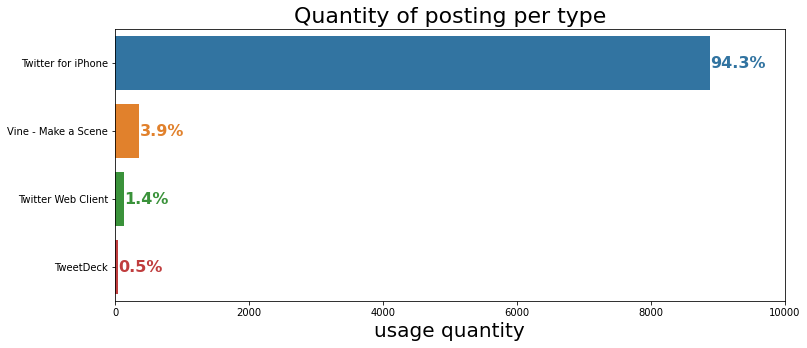

In [66]:
fig, ax = plt.subplots(figsize=(12,5))

g = sns.barplot(x=use_rank.values, y=use_rank.index, orient='h', ax=ax) 

bars = [r for r in ax.get_children() if type(r)==Rectangle]

colors = [rgb2hex(c.get_facecolor()) for c in bars[:-1]] 

for (i, (a, b)) in enumerate(zip(use_rank, perc)):
    ax.text(a, i, "{}%".format(b), va="center", color=colors[i], fontsize=16, fontweight="bold")
    

ax.set_title('Quantity of posting per type', fontsize=22)

ax.set_xlabel('usage quantity', fontsize=20)

ax.set_xlim(0,10000)

In [67]:
ti_df["timestamp"] = pd.to_datetime(ti_df["timestamp"], format="%Y-%m-%d %H:%M:%S%z")

ti_df['year'] = pd.DatetimeIndex(ti_df['timestamp']).year

ti_df['month'] = pd.DatetimeIndex(ti_df['timestamp']).month
ti_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 16 columns):
tweet_id                      9424 non-null object
in_reply_to_status_id         312 non-null float64
in_reply_to_user_id           312 non-null float64
timestamp                     9424 non-null datetime64[ns, UTC]
source                        9424 non-null object
text                          9424 non-null object
retweeted_status_id           724 non-null object
retweeted_status_user_id      724 non-null float64
retweeted_status_timestamp    724 non-null object
expanded_urls                 9188 non-null object
rating_numerator              9412 non-null float64
rating_denominator            9412 non-null float64
name                          6008 non-null object
dog_stage                     394 non-null object
year                          9424 non-null int64
month                         9424 non-null int64
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(8)
mem

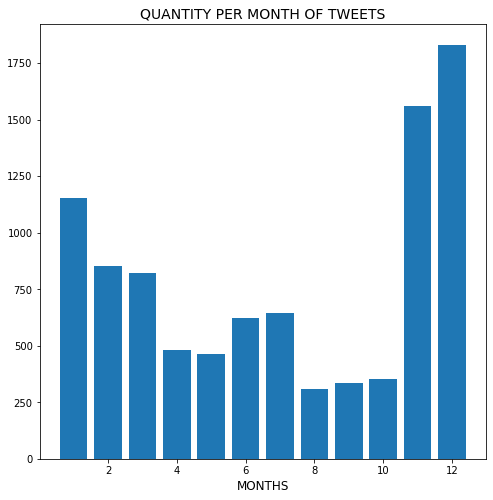

In [68]:
month = ti_df["month"].value_counts()

plt.figure(figsize=(8, 8))

ind_y = month.index.values 
value_y = month.values

plt.bar(ind_y, value_y)

plt.title("Quantity per Month of Tweets".upper(), fontsize=14, loc="center")


plt.xlabel("Months".upper(), fontsize=12)
           
plt.show;


In [69]:
top_likes = ip_mi.groupby("p1")["favorite_count"].mean().sort_values(ascending=False).head(5)

In [70]:
total_likes = ip_mi["favorite_count"].sum()
perc_likes = np.round((top_likes/total_likes)*10000, 1)
perc_likes

p1
Angora           52.8
Arabian Camel    46.5
Laptop           37.9
Gondola          30.4
Conch            26.9
Name: favorite_count, dtype: float64

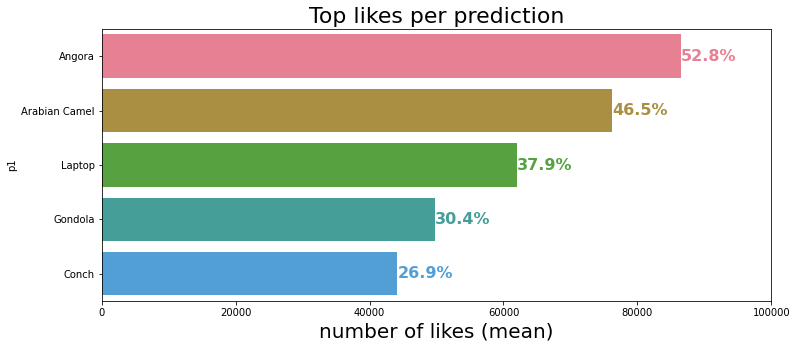

In [71]:
fig, ax = plt.subplots(figsize=(12,5))

with sns.color_palette("husl"):
    g = sns.barplot(x=top_likes.values, y=top_likes.index, orient='h', ax=ax)

    bars = [r for r in ax.get_children() if type(r)==Rectangle]

    colors = [rgb2hex(c.get_facecolor()) for c in bars[:-1]] 

    for (i, (a, b)) in enumerate(zip(top_likes, perc_likes)):
        ax.text(a, i, "{}%".format(b), va="center", color=colors[i], fontsize=16, fontweight="bold")


    ax.set_title('Top likes per prediction', fontsize=22)

    ax.set_xlabel('number of likes (mean)', fontsize=20)

    ax.set_xlim(0,100000)

    plt.show()